In [3]:
import pandas as pd
import seaborn as sns
import math
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy import stats
%matplotlib inline
file_name = "3mj0_gen0"
final_most_probable_value = {}

In [2]:
angle_dict = dict.fromkeys(['BB1_BB2_BB3','BB2_BB3_ASC1','BB3_ASC1_ASC2','BB3_ASC1_ASC4','ASC1_ASC2_ASC3',\
'ASC2_ASC1_ASC4','ASC2_ASC3_ASC4','ASC3_ASC4_ASC1','BB2_BB3_USC1','BB3_USC1_USC2','BB3_USC1_USC3','USC1_USC2_USC3',\
'USC1_USC2_USC3','USC2_USC1_USC3','USC2_USC3_USC1','BB2_BB3_GSC1','BB3_GSC1_GSC2','BB3_GSC1_GSC4','GSC1_GSC2_GSC3','GSC2_GSC1_GSC4',\
'GSC2_GSC3_GSC4','GSC3_GSC4_GSC1','BB2_BB3_CSC1','BB3_CSC1_CSC2','BB3_CSC1_CSC3','CSC1_CSC2_CSC3','CSC2_CSC1_CSC3',\
'CSC2_CSC3_CSC1','BB2_BB3_pBB1','BB3_pBB1_pBB2','ASC1_BB3_pBB1','USC1_BB3_pBB1','GSC1_BB3_pBB1','CSC1_BB3_pBB1'])

In [3]:
df_Hmapped_angle_all = pd.read_csv('../launch_CG_simulations/'+file_name+'/final_angles.csv')

In [4]:
BB1_BB2_BB3 = df_Hmapped_angle_all['BB1_BB2_BB3']
BB2_BB3_ASC1 = df_Hmapped_angle_all['BB2_BB3_ASC1']
BB3_ASC1_ASC2 = df_Hmapped_angle_all['BB3_ASC1_ASC2']
BB3_ASC1_ASC4 = df_Hmapped_angle_all['BB3_ASC1_ASC4']
ASC1_ASC2_ASC3 = df_Hmapped_angle_all['ASC1_ASC2_ASC3']
ASC2_ASC1_ASC4 = df_Hmapped_angle_all['ASC2_ASC1_ASC4']
ASC2_ASC3_ASC4 = df_Hmapped_angle_all['ASC2_ASC3_ASC4']
ASC3_ASC4_ASC1 = df_Hmapped_angle_all['ASC3_ASC4_ASC1']
BB2_BB3_USC1 = df_Hmapped_angle_all['BB2_BB3_USC1']
BB3_USC1_USC2 = df_Hmapped_angle_all['BB3_USC1_USC2']
BB3_USC1_USC3 = df_Hmapped_angle_all['BB3_USC1_USC3']
USC1_USC2_USC3 = df_Hmapped_angle_all['USC1_USC2_USC3']
BB3_USC1_USC3 = df_Hmapped_angle_all['BB3_USC1_USC3']
USC2_USC1_USC3 = df_Hmapped_angle_all['USC2_USC1_USC3']
USC2_USC3_USC1 = df_Hmapped_angle_all['USC2_USC3_USC1']
BB2_BB3_ASC1 = df_Hmapped_angle_all['BB2_BB3_ASC1']
BB2_BB3_GSC1 = df_Hmapped_angle_all['BB2_BB3_GSC1']
BB3_GSC1_GSC2 = df_Hmapped_angle_all['BB3_GSC1_GSC2']
BB3_GSC1_GSC4 = df_Hmapped_angle_all['BB3_GSC1_GSC4']
GSC1_GSC2_GSC3 = df_Hmapped_angle_all['GSC1_GSC2_GSC3']
GSC2_GSC1_GSC4 = df_Hmapped_angle_all['GSC2_GSC1_GSC4']
GSC2_GSC3_GSC4 = df_Hmapped_angle_all['GSC2_GSC3_GSC4']
GSC3_GSC4_GSC1 = df_Hmapped_angle_all['GSC3_GSC4_GSC1']
BB2_BB3_CSC1 = df_Hmapped_angle_all['BB2_BB3_CSC1']
BB3_CSC1_CSC2 = df_Hmapped_angle_all['BB3_CSC1_CSC2']
BB3_CSC1_CSC3 = df_Hmapped_angle_all['BB3_CSC1_CSC3']
CSC1_CSC2_CSC3 = df_Hmapped_angle_all['CSC1_CSC2_CSC3']
CSC2_CSC1_CSC3 = df_Hmapped_angle_all['CSC2_CSC1_CSC3']
CSC2_CSC3_CSC1 = df_Hmapped_angle_all['CSC2_CSC3_CSC1']
BB2_BB3_pBB1 = df_Hmapped_angle_all['BB2_BB3_pBB1']
BB3_pBB1_pBB2 = df_Hmapped_angle_all['BB3_pBB1_pBB2']
ASC1_BB3_pBB1 = df_Hmapped_angle_all['ASC1_BB3_pBB1']
USC1_BB3_pBB1 = df_Hmapped_angle_all['USC1_BB3_pBB1']
GSC1_BB3_pBB1 = df_Hmapped_angle_all['GSC1_BB3_pBB1']
CSC1_BB3_pBB1 = df_Hmapped_angle_all['CSC1_BB3_pBB1']

In [80]:
BB1_BB2_BB3

[110.66198223257,
 117.480819529511,
 71.6841776013365,
 102.043674186445,
 102.05151194019301,
 102.103382118122,
 108.336226084421,
 101.768149800379,
 101.87305739923,
 102.142630500422,
 102.248758925133]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3
Mean: Raw data 75.18248510369696
Most Probable Value 71.6846694886902


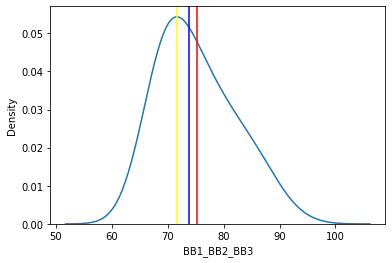

In [5]:
# Density Plot and Histogram 
xmedian = np.median(BB1_BB2_BB3)
xmean = np.mean(BB1_BB2_BB3)
ax = sns.kdeplot(BB1_BB2_BB3,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB1_BB2_BB3")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB1_BB2_BB3"] = x[maxid]

BB2_BB3_ASC1
Mean: Raw data 56.9405101370804
Most Probable Value 51.964675734080544


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


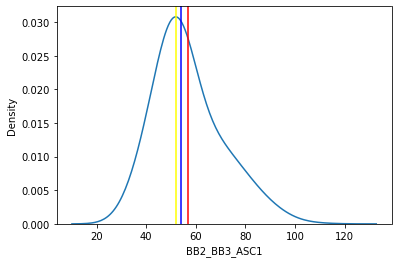

In [6]:
# Density Plot and Histogram 
xmedian = np.median(BB2_BB3_ASC1)
xmean = np.mean(BB2_BB3_ASC1)
ax = sns.kdeplot(BB2_BB3_ASC1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_ASC1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB2_BB3_ASC1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_ASC1_ASC2
Mean: Raw data 72.89791684522069
Most Probable Value 70.91340868945576


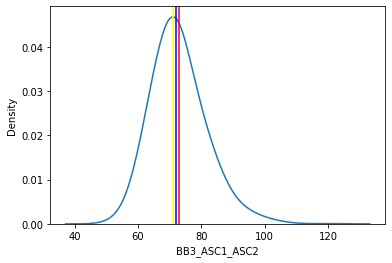

In [7]:
# Density Plot and Histogram 
xmedian = np.median(BB3_ASC1_ASC2)
xmean = np.mean(BB3_ASC1_ASC2)
ax = sns.kdeplot(BB3_ASC1_ASC2,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_ASC1_ASC2")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB3_ASC1_ASC2"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_ASC1_ASC4
Mean: Raw data 69.6555694917398
Most Probable Value 71.53999656200715


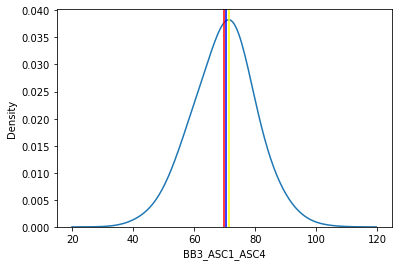

In [8]:
# Density Plot and Histogram 
xmedian = np.median(BB3_ASC1_ASC4)
xmean = np.mean(BB3_ASC1_ASC4)
ax = sns.kdeplot(BB3_ASC1_ASC4,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_ASC1_ASC4")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB3_ASC1_ASC4"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC2_ASC3
Mean: Raw data 72.54335119122932
Most Probable Value 70.76139861154441


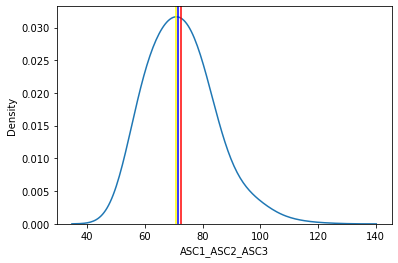

In [9]:
# Density Plot and Histogram 
xmedian = np.median(ASC1_ASC2_ASC3)
xmean = np.mean(ASC1_ASC2_ASC3)
ax = sns.kdeplot(ASC1_ASC2_ASC3,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC1_ASC2_ASC3")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["ASC1_ASC2_ASC3"] = x[maxid]

ASC2_ASC1_ASC4
Mean: Raw data 54.45498671679454
Most Probable Value 51.72814559977374


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


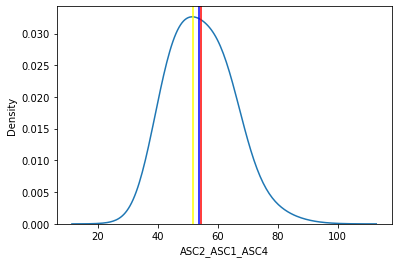

In [10]:
# Density Plot and Histogram 
xmedian = np.median(ASC2_ASC1_ASC4)
xmean = np.mean(ASC2_ASC1_ASC4)
ax = sns.kdeplot(ASC2_ASC1_ASC4,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC2_ASC1_ASC4")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["ASC2_ASC1_ASC4"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC3_ASC4
Mean: Raw data 74.0408611173192
Most Probable Value 72.91557314678445


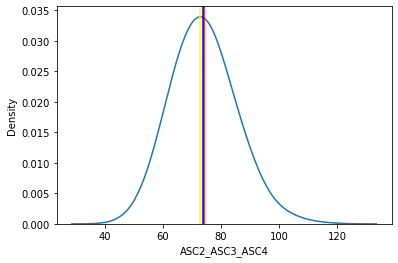

In [11]:
# Density Plot and Histogram 
xmedian = np.median(ASC2_ASC3_ASC4)
xmean = np.mean(ASC2_ASC3_ASC4)
ax = sns.kdeplot(ASC2_ASC3_ASC4,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC2_ASC3_ASC4")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["ASC2_ASC3_ASC4"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC3_ASC4_ASC1
Mean: Raw data 72.60875946210086
Most Probable Value 73.3684995647155


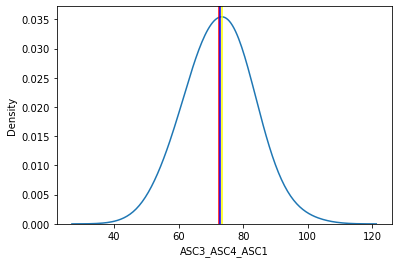

In [12]:
# Density Plot and Histogram 
xmedian = np.median(ASC3_ASC4_ASC1)
xmean = np.mean(ASC3_ASC4_ASC1)
ax = sns.kdeplot(ASC3_ASC4_ASC1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC3_ASC4_ASC1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["ASC3_ASC4_ASC1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_USC1
Mean: Raw data 75.35241773631324
Most Probable Value 72.14357142017205


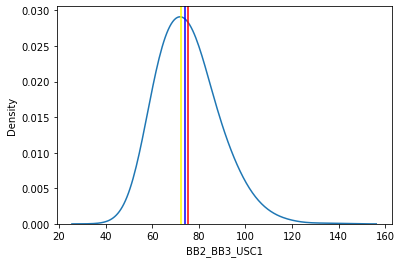

In [13]:
# Density Plot and Histogram 
xmedian = np.median(BB2_BB3_USC1)
xmean = np.mean(BB2_BB3_USC1)
ax = sns.kdeplot(BB2_BB3_USC1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_USC1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB2_BB3_USC1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_USC1_USC2
Mean: Raw data 83.3268038617526
Most Probable Value 85.75735052607834


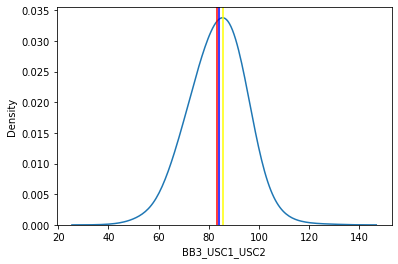

In [14]:
# Density Plot and Histogram 
xmedian = np.median(BB3_USC1_USC2)
xmean = np.mean(BB3_USC1_USC2)
ax = sns.kdeplot(BB3_USC1_USC2,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_USC1_USC2")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB3_USC1_USC2"] = x[maxid]

BB3_USC1_USC3
Mean: Raw data 85.98186788387179
Most Probable Value 81.39217454709059


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


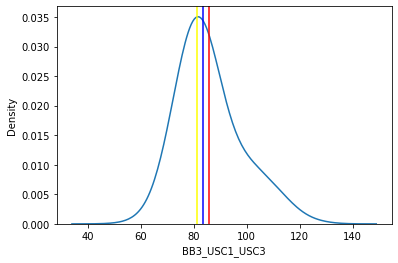

In [15]:
# Density Plot and Histogram 
xmedian = np.median(BB3_USC1_USC3)
xmean = np.mean(BB3_USC1_USC3)
ax = sns.kdeplot(BB3_USC1_USC3,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_USC1_USC3")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB3_USC1_USC3"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_USC2_USC3
Mean: Raw data 56.252564673789344
Most Probable Value 52.0759001110646


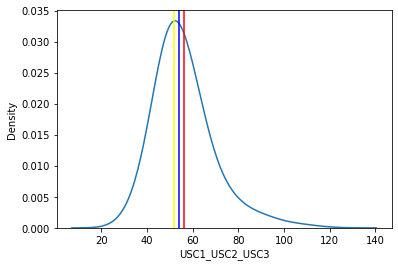

In [16]:
# Density Plot and Histogram 
xmedian = np.median(USC1_USC2_USC3)
xmean = np.mean(USC1_USC2_USC3)
ax = sns.kdeplot(USC1_USC2_USC3,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("USC1_USC2_USC3")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["USC1_USC2_USC3"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_USC1_USC3
Mean: Raw data 85.98186788387179
Most Probable Value 81.39217454709059


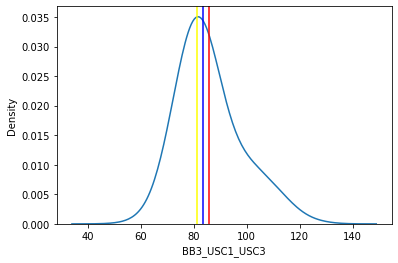

In [17]:
# Density Plot and Histogram 
xmedian = np.median(BB3_USC1_USC3)
xmean = np.mean(BB3_USC1_USC3)
ax = sns.kdeplot(BB3_USC1_USC3,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_USC1_USC3")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB3_USC1_USC3"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC2_USC1_USC3
Mean: Raw data 79.56441931805608
Most Probable Value 77.1617559483527


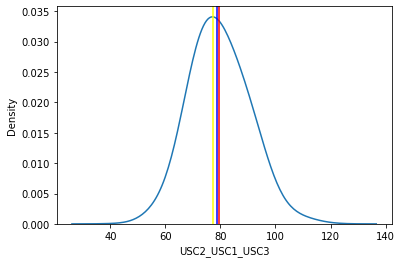

In [18]:
# Density Plot and Histogram 
xmedian = np.median(USC2_USC1_USC3)
xmean = np.mean(USC2_USC1_USC3)
ax = sns.kdeplot(USC2_USC1_USC3,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("USC2_USC1_USC3")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["USC2_USC1_USC3"] = x[maxid]

USC2_USC3_USC1
Mean: Raw data 65.67160751720691
Most Probable Value 60.97700305896833


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


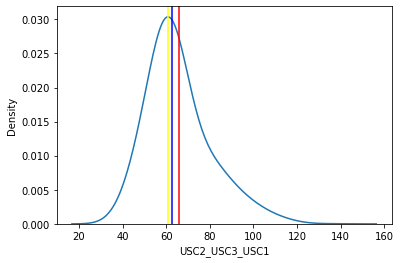

In [19]:
# Density Plot and Histogram 
xmedian = np.median(USC2_USC3_USC1)
xmean = np.mean(USC2_USC3_USC1)
ax = sns.kdeplot(USC2_USC3_USC1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("USC2_USC3_USC1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["USC2_USC3_USC1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_ASC1
Mean: Raw data 56.9405101370804
Most Probable Value 51.964675734080544


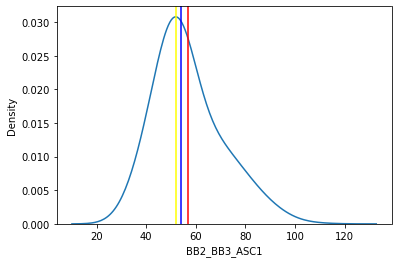

In [20]:
# Density Plot and Histogram 
xmedian = np.median(BB2_BB3_ASC1)
xmean = np.mean(BB2_BB3_ASC1)
ax = sns.kdeplot(BB2_BB3_ASC1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_ASC1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB2_BB3_ASC1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_GSC1
Mean: Raw data 69.07027651931215
Most Probable Value 67.08210622256387


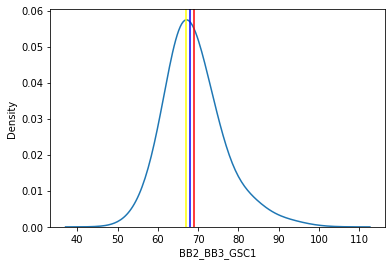

In [21]:
# Density Plot and Histogram 
xmedian = np.median(BB2_BB3_GSC1)
xmean = np.mean(BB2_BB3_GSC1)
ax = sns.kdeplot(BB2_BB3_GSC1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_GSC1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB2_BB3_GSC1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_GSC2
Mean: Raw data 73.32199334198597
Most Probable Value 66.77359446437367


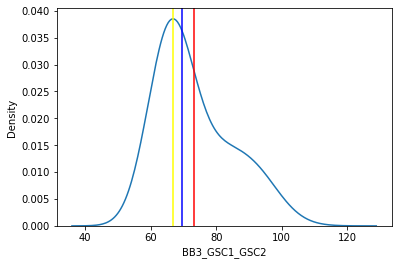

In [22]:
# Density Plot and Histogram 
xmedian = np.median(BB3_GSC1_GSC2)
xmean = np.mean(BB3_GSC1_GSC2)
ax = sns.kdeplot(BB3_GSC1_GSC2,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_GSC1_GSC2")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB3_GSC1_GSC2"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_GSC4
Mean: Raw data 79.71036749613206
Most Probable Value 78.91486977901988


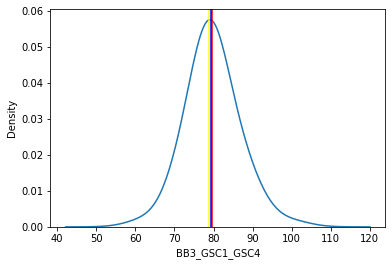

In [23]:
# Density Plot and Histogram 
xmedian = np.median(BB3_GSC1_GSC4)
xmean = np.mean(BB3_GSC1_GSC4)
ax = sns.kdeplot(BB3_GSC1_GSC4,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_GSC1_GSC4")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB3_GSC1_GSC4"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_GSC2_GSC3
Mean: Raw data 83.97800434289489
Most Probable Value 81.97427894067224


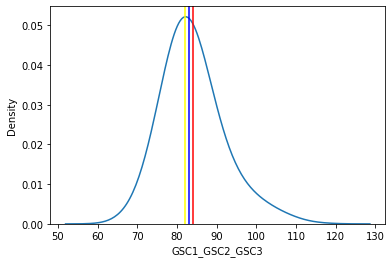

In [24]:
# Density Plot and Histogram 
xmedian = np.median(GSC1_GSC2_GSC3)
xmean = np.mean(GSC1_GSC2_GSC3)
ax = sns.kdeplot(GSC1_GSC2_GSC3,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC1_GSC2_GSC3")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["GSC1_GSC2_GSC3"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC1_GSC4
Mean: Raw data 62.96774866335364
Most Probable Value 59.80343434565694


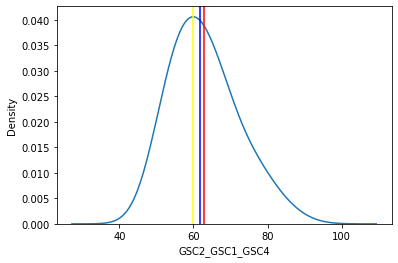

In [25]:
# Density Plot and Histogram 
xmedian = np.median(GSC2_GSC1_GSC4)
xmean = np.mean(GSC2_GSC1_GSC4)
ax = sns.kdeplot(GSC2_GSC1_GSC4,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC2_GSC1_GSC4")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["GSC2_GSC1_GSC4"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC3_GSC4
Mean: Raw data 82.7327129984507
Most Probable Value 82.13631499266933


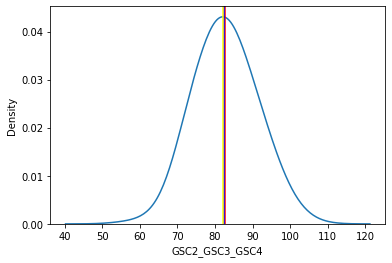

In [26]:
# Density Plot and Histogram 
xmedian = np.median(GSC2_GSC3_GSC4)
xmean = np.mean(GSC2_GSC3_GSC4)
ax = sns.kdeplot(GSC2_GSC3_GSC4,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC2_GSC3_GSC4")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["GSC2_GSC3_GSC4"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC3_GSC4_GSC1
Mean: Raw data 58.031050191532366
Most Probable Value 54.789616572591065


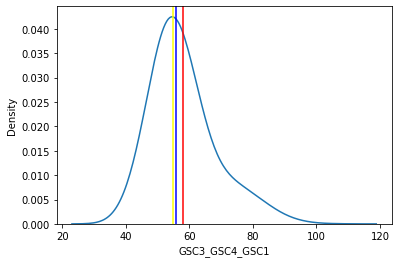

In [27]:
# Density Plot and Histogram 
xmedian = np.median(GSC3_GSC4_GSC1)
xmean = np.mean(GSC3_GSC4_GSC1)
ax = sns.kdeplot(GSC3_GSC4_GSC1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC3_GSC4_GSC1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["GSC3_GSC4_GSC1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_CSC1
Mean: Raw data 57.3265313557043
Most Probable Value 49.54659217584958


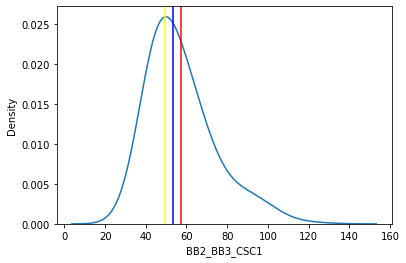

In [28]:
# Density Plot and Histogram 
xmedian = np.median(BB2_BB3_CSC1)
xmean = np.mean(BB2_BB3_CSC1)
ax = sns.kdeplot(BB2_BB3_CSC1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_CSC1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB2_BB3_CSC1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_CSC1_CSC2
Mean: Raw data 55.31994835473465
Most Probable Value 46.49754652091962


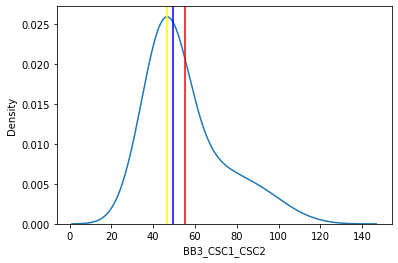

In [29]:
# Density Plot and Histogram 
xmedian = np.median(BB3_CSC1_CSC2)
xmean = np.mean(BB3_CSC1_CSC2)
ax = sns.kdeplot(BB3_CSC1_CSC2,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_CSC1_CSC2")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB3_CSC1_CSC2"] = x[maxid]

BB3_CSC1_CSC3
Mean: Raw data 64.7105414074394
Most Probable Value 60.06208133763076


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


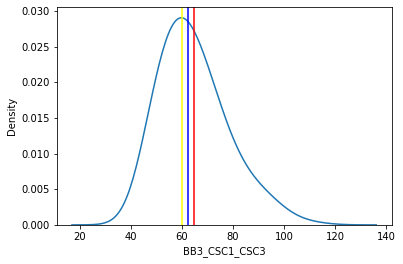

In [30]:
# Density Plot and Histogram 
xmedian = np.median(BB3_CSC1_CSC3)
xmean = np.mean(BB3_CSC1_CSC3)
ax = sns.kdeplot(BB3_CSC1_CSC3,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_CSC1_CSC3")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB3_CSC1_CSC3"] = x[maxid]

CSC1_CSC2_CSC3
Mean: Raw data 66.83531632803705
Most Probable Value 61.914586006882644


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


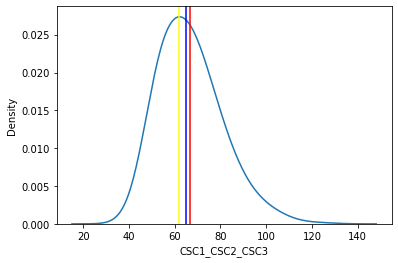

In [31]:
# Density Plot and Histogram 
xmedian = np.median(CSC1_CSC2_CSC3)
xmean = np.mean(CSC1_CSC2_CSC3)
ax = sns.kdeplot(CSC1_CSC2_CSC3,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("CSC1_CSC2_CSC3")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["CSC1_CSC2_CSC3"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC1_CSC3
Mean: Raw data 59.35767627815707
Most Probable Value 60.844514656853


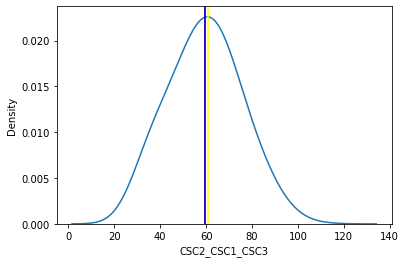

In [32]:
# Density Plot and Histogram 
xmedian = np.median(CSC2_CSC1_CSC3)
xmean = np.mean(CSC2_CSC1_CSC3)
ax = sns.kdeplot(CSC2_CSC1_CSC3,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("CSC2_CSC1_CSC3")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["CSC2_CSC1_CSC3"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC3_CSC1
Mean: Raw data 73.2242335746138
Most Probable Value 69.63453391742803


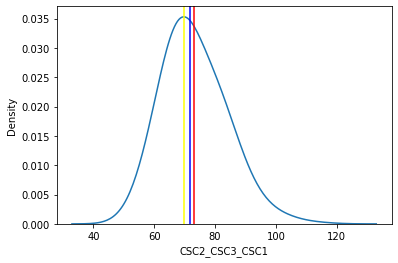

In [33]:
# Density Plot and Histogram 
xmedian = np.median(CSC2_CSC3_CSC1)
xmean = np.mean(CSC2_CSC3_CSC1)
ax = sns.kdeplot(CSC2_CSC3_CSC1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("CSC2_CSC3_CSC1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["CSC2_CSC3_CSC1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_pBB1
Mean: Raw data 67.79584642766925
Most Probable Value 66.11025050498125


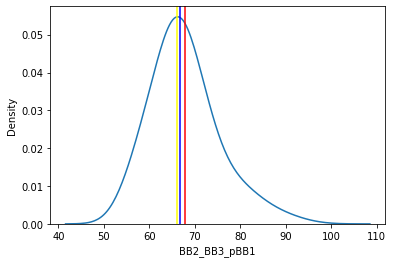

In [34]:
# Density Plot and Histogram 
xmedian = np.median(BB2_BB3_pBB1)
xmean = np.mean(BB2_BB3_pBB1)
ax = sns.kdeplot(BB2_BB3_pBB1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_pBB1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB2_BB3_pBB1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_pBB1_pBB2
Mean: Raw data 71.0698649437282
Most Probable Value 70.41785434261666


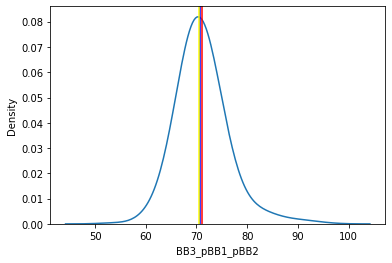

In [35]:
# Density Plot and Histogram 
xmedian = np.median(BB3_pBB1_pBB2)
xmean = np.mean(BB3_pBB1_pBB2)
ax = sns.kdeplot(BB3_pBB1_pBB2,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_pBB1_pBB2")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB3_pBB1_pBB2"] = x[maxid]

ASC1_BB3_pBB1
Mean: Raw data 63.80720207954736
Most Probable Value 57.47176759209808


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


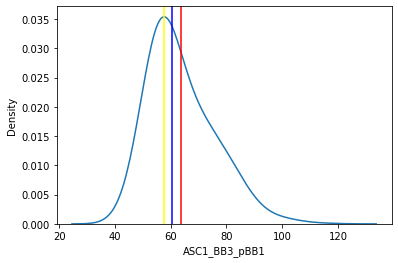

In [36]:
# Density Plot and Histogram 
xmedian = np.median(ASC1_BB3_pBB1)
xmean = np.mean(ASC1_BB3_pBB1)
ax = sns.kdeplot(ASC1_BB3_pBB1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC1_BB3_pBB1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["ASC1_BB3_pBB1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_BB3_pBB1
Mean: Raw data 65.26287387943572
Most Probable Value 62.29569406248426


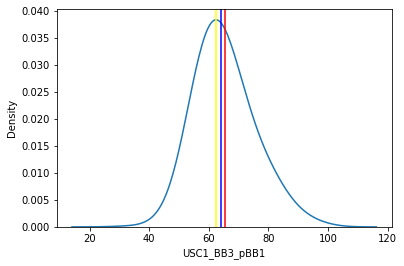

In [37]:
# Density Plot and Histogram 
xmedian = np.median(USC1_BB3_pBB1)
xmean = np.mean(USC1_BB3_pBB1)
ax = sns.kdeplot(USC1_BB3_pBB1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("USC1_BB3_pBB1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["USC1_BB3_pBB1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_BB3_pBB1
Mean: Raw data 67.58641137687593
Most Probable Value 63.74923100187816


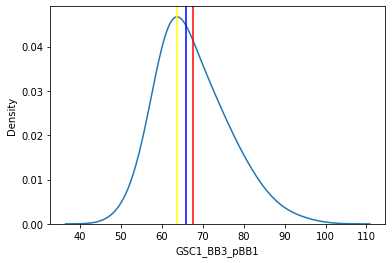

In [38]:
# Density Plot and Histogram 
xmedian = np.median(GSC1_BB3_pBB1)
xmean = np.mean(GSC1_BB3_pBB1)
ax = sns.kdeplot(GSC1_BB3_pBB1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC1_BB3_pBB1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["GSC1_BB3_pBB1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_BB3_pBB1
Mean: Raw data 59.79899594389434
Most Probable Value 55.118113844235125


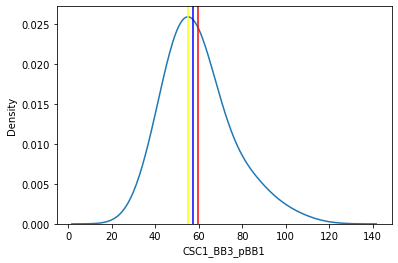

In [39]:
# Density Plot and Histogram 
xmedian = np.median(CSC1_BB3_pBB1)
xmean = np.mean(CSC1_BB3_pBB1)
ax = sns.kdeplot(CSC1_BB3_pBB1,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC1_BB3_pBB1")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["CSC1_BB3_pBB1"] = x[maxid]

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_ASC1_ASC2
Mean: Raw data 72.89791684522069
Most Probable Value 70.91340868945576


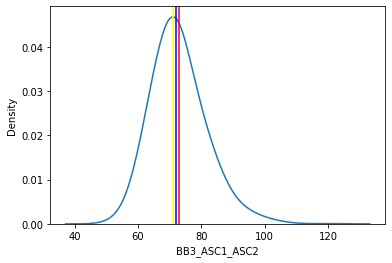

In [40]:
# Density Plot and Histogram 
xmedian = np.median(BB3_ASC1_ASC2)
xmean = np.mean(BB3_ASC1_ASC2)
ax = sns.kdeplot(BB3_ASC1_ASC2,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_ASC1_ASC2")
print("Mean: Raw data",xmean)
print("Most Probable Value",x[maxid])
final_most_probable_value["BB3_ASC1_ASC2"] = x[maxid]

In [41]:
print(final_most_probable_value['ASC1_ASC2_ASC3'])
print(final_most_probable_value['BB3_USC1_USC2'])
print(final_most_probable_value['CSC1_CSC2_CSC3'])
print(final_most_probable_value['GSC3_GSC4_GSC1'])
print(final_most_probable_value['CSC2_CSC3_CSC1'])
print(final_most_probable_value['GSC2_GSC3_GSC4'])
print(final_most_probable_value['BB3_CSC1_CSC2'])
print(final_most_probable_value['BB2_BB3_CSC1'])
print(final_most_probable_value['ASC2_ASC1_ASC4'])
print(final_most_probable_value['USC1_USC2_USC3'])
print(final_most_probable_value['GSC2_GSC1_GSC4'])
print(final_most_probable_value['CSC2_CSC1_CSC3'])
print(final_most_probable_value['GSC1_BB3_pBB1'])
print(final_most_probable_value['BB3_ASC1_ASC2'])
print(final_most_probable_value['ASC1_BB3_pBB1'])
print(final_most_probable_value['BB3_GSC1_GSC2'])
print(final_most_probable_value['BB1_BB2_BB3'])
print(final_most_probable_value['CSC1_BB3_pBB1'])
print(final_most_probable_value['USC1_BB3_pBB1'])
print(final_most_probable_value['BB3_ASC1_ASC4'])
print(final_most_probable_value['GSC1_GSC2_GSC3'])
print(final_most_probable_value['ASC3_ASC4_ASC1'])
print(final_most_probable_value['USC2_USC3_USC1'])
print(final_most_probable_value['BB2_BB3_USC1'])
print(final_most_probable_value['BB3_CSC1_CSC3'])
print(final_most_probable_value['BB2_BB3_pBB1'])
print(final_most_probable_value['BB2_BB3_GSC1'])
print(final_most_probable_value['BB3_USC1_USC3'])
print(final_most_probable_value['ASC2_ASC3_ASC4'])
print(final_most_probable_value['BB3_pBB1_pBB2'])
print(final_most_probable_value['BB2_BB3_ASC1'])
print(final_most_probable_value['BB3_GSC1_GSC4'])
print(final_most_probable_value['USC2_USC1_USC3'])




70.76139861154441
85.75735052607834
61.914586006882644
54.789616572591065
69.63453391742803
82.13631499266933
46.49754652091962
49.54659217584958
51.72814559977374
52.0759001110646
59.80343434565694
60.844514656853
63.74923100187816
70.91340868945576
57.47176759209808
66.77359446437367
71.6846694886902
55.118113844235125
62.29569406248426
71.53999656200715
81.97427894067224
73.3684995647155
60.97700305896833
72.14357142017205
60.06208133763076
66.11025050498125
67.08210622256387
81.39217454709059
72.91557314678445
70.41785434261666
51.964675734080544
78.91486977901988
77.1617559483527


In [48]:
ASC1_ASC2_ASC3 = []
BB3_USC1_USC2=[]
CSC1_CSC2_CSC3=[]
GSC3_GSC4_GSC1=[]
CSC2_CSC3_CSC1=[]
GSC2_GSC3_GSC4=[]
BB3_CSC1_CSC2=[]
BB2_BB3_CSC1 = []
ASC2_ASC1_ASC4 = []
USC1_USC2_USC3 = []
GSC2_GSC1_GSC4 = []
CSC2_CSC1_CSC3 = []
GSC1_BB3_pBB1 = []
BB3_ASC1_ASC2 = []
ASC1_BB3_pBB1 = []
BB3_GSC1_GSC2 = []
BB1_BB2_BB3 = []
CSC1_BB3_pBB1 = []
USC1_BB3_pBB1 = []
BB3_ASC1_ASC4 = []
GSC1_GSC2_GSC3 = []
ASC3_ASC4_ASC1 = []
USC2_USC3_USC1 = []
BB2_BB3_USC1 = []
BB3_CSC1_CSC3 = []
BB2_BB3_pBB1 = []
BB2_BB3_GSC1 = []
BB3_USC1_USC3 = []
ASC2_ASC3_ASC4 = []
BB3_pBB1_pBB2 = [] 
BB2_BB3_ASC1 = [] 
BB3_GSC1_GSC4 = []
USC2_USC1_USC3 = []
import os

In [49]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['ASC1_ASC2_ASC3'][0]
    ASC1_ASC2_ASC3.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)


final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [50]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB3_USC1_USC2'][0]
    BB3_USC1_USC2.append(data)
for i in BB3_USC1_USC2:
    print(i)

101.57198382396999
98.756396282539
85.7573312286754
97.24073954458478
97.35390661726039
97.28210242016719
104.625476948143
97.1952262845661
91.41473288913629
97.2178507955492
96.92201049063401


In [51]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['CSC1_CSC2_CSC3'][0]
    CSC1_CSC2_CSC3.append(data)
for i in CSC1_CSC2_CSC3:
    print(i)
    


final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
62.6066623137181
62.6490595429979
61.9132887301923
62.6368878092868
62.6345072858352
62.6165332987946
62.5928589689143
62.60851089163529
62.646911115324
62.6244381452809
62.616165106321894


In [52]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['GSC3_GSC4_GSC1'][0]
    GSC3_GSC4_GSC1.append(data)
for i in GSC3_GSC4_GSC1:
    print(i)



final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
91.7097615171131
91.99014400150992
54.7884834477966
92.6193756071615
92.6309792366324
92.69589315282741
91.8327959949724
92.6716820870309
92.20568457870729
92.7093908690087
92.5174480699471


In [53]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['CSC2_CSC3_CSC1'][0]
    CSC2_CSC3_CSC1.append(data)
for i in CSC2_CSC3_CSC1:
    print(i)
    


final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
48.156073692485705
48.1435224618437
69.6336163768497
48.158875607001804
48.15567953476499
48.167907502182395
48.1749556507082
48.20207954215
48.152839000917304
48.19526296824721
48.187051581347504


In [54]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['GSC2_GSC3_GSC4'][0]
    GSC2_GSC3_GSC4.append(data)
for i in GSC2_GSC3_GSC4:
    print(i)
    


final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
82.95945626243191
82.7810538710627
82.13642289825201
83.5845783393608
83.47138891627719
83.4264918703361
82.884777129149
83.30645851319409
83.2630311470329
83.5647479124105
83.439518518425


In [55]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB3_CSC1_CSC2'][0]
    BB3_CSC1_CSC2.append(data)
for i in BB3_CSC1_CSC2:
    print(i)
    


final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
65.6461834694316
103.83977629341601
46.49560617876579
98.9404037630409
98.69703165010729
98.7318761720031
89.1715169029601
98.3046396052941
97.2068233071686
98.80696489834749
98.8243680874922


In [56]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB2_BB3_CSC1'][0]
    BB2_BB3_CSC1.append(data)
for i in BB2_BB3_CSC1:
    print(i)
# for file in os.listdir("../launch_CG_simulations/angle_evolution"):
#     print(file)
#     data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['ASC2_ASC1_ASC4'][0]
#     ASC2_ASC1_ASC4.append(data)


final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
24.643771549780897
94.15842689691591
49.544774120016896
29.481300646090805
32.452160818190606
32.7708118709886
28.156230106873398
34.5002381665444
33.3040337278588
29.434394089658998
29.378054182154102


In [57]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['USC1_USC2_USC3'][0]
    USC1_USC2_USC3.append(data)
for i in USC1_USC2_USC3:
    print(i)
    


final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
47.281360835997496
63.59819906427871
52.0744769262748
47.3697726506774
47.3483244410738
47.351202444235
47.4129988708604
47.3335695626181
47.3462243588776
47.3503023001455
47.337440303625606


In [58]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['GSC2_GSC1_GSC4'][0]
    GSC2_GSC1_GSC4.append(data)
for i in GSC2_GSC1_GSC4:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
111.054519766526
112.660938756721
59.8028240339835
112.334729821102
112.15172601699499
112.060894497794
110.987568683519
111.905711069774
111.817344327995
112.144491325412
112.190995051022


In [59]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['CSC2_CSC1_CSC3'][0]
    CSC2_CSC1_CSC3.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [60]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['GSC1_BB3_pBB1'][0]
    GSC1_BB3_pBB1.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [61]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB3_ASC1_ASC2'][0]
    BB3_ASC1_ASC2.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [62]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['ASC1_BB3_pBB1'][0]
    ASC1_BB3_pBB1.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [63]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB3_GSC1_GSC2'][0]
    BB3_GSC1_GSC2.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)
    

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [64]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB1_BB2_BB3'][0]
    BB1_BB2_BB3.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [65]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['CSC1_BB3_pBB1'][0]
    CSC1_BB3_pBB1.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [66]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['USC1_BB3_pBB1'][0]
    USC1_BB3_pBB1.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [67]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB3_ASC1_ASC4'][0]
    BB3_ASC1_ASC4.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [68]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['GSC1_GSC2_GSC3'][0]
    GSC1_GSC2_GSC3.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [69]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['ASC3_ASC4_ASC1'][0]
    ASC3_ASC4_ASC1.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [70]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['USC2_USC3_USC1'][0]
    USC2_USC3_USC1.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [71]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB2_BB3_USC1'][0]
    BB2_BB3_USC1.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [72]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB3_CSC1_CSC3'][0]
    BB3_CSC1_CSC3.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [73]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB2_BB3_pBB1'][0]
    BB2_BB3_pBB1.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [74]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB2_BB3_GSC1'][0]
    BB2_BB3_GSC1.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [75]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB3_USC1_USC3'][0]
    BB3_USC1_USC3.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [76]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB3_pBB1_pBB2'][0]
    BB3_pBB1_pBB2.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [77]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB2_BB3_ASC1'][0]
    BB2_BB3_ASC1.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [78]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['BB3_GSC1_GSC4'][0]
    BB3_GSC1_GSC4.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301


In [79]:
for file in os.listdir("../launch_CG_simulations/angle_evolution"):
    print(file)
    data = pd.read_csv("../launch_CG_simulations/angle_evolution/"+file)['USC2_USC1_USC3'][0]
    USC2_USC1_USC3.append(data)
for i in ASC1_ASC2_ASC3:
    print(i)

final_angles_gen0.csv
final_angles_gen9.csv
final_angles_gen3.csv
final_angles_gen8.csv
final_angles_gen4.csv
final_angles_gen6.csv
final_angles_gen1.csv
final_angles_gen5.csv
final_angles_gen2.csv
final_angles_gen10.csv
final_angles_gen7.csv
84.20209521091371
86.3188330972712
70.7600848411076
81.3418011870073
81.2332899436399
81.380341930201
84.266064270399
81.2073099193563
83.6645025566457
81.3081335863508
81.31765779243301
